In [1]:
# *********************************************************************************
# 
# Project to course Neural networks in applications
# 
# Author: Bistakova Lenka, Brnovik Diana
# PEF MENDELU 2020
# 
# Used dataset: Student Alcohol Consumption - Portuguese language course dataset
# URL of dataset: https://data.world/data-society/student-alcohol-consumption
# 
# *********************************************************************************

In [2]:
import numpy as np
import pylab as pl
import pandas as pd
import neurolab as nl
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from scipy import stats

In [3]:
def convert(list): 
    r = []
    for l in list:
        c = np.array(l)
        if (c==[0,0]).all():
            r.append(1)
        elif (c==[0,1]).all():
            r.append(2)
        elif (c==[1,0]).all():
            r.append(3)
        elif (c==[1,1]).all():
            r.append(4)
        else:
            r.append(5)
    return r 

In [4]:
### Load data

data = pd.DataFrame(pd.read_csv('../data/alcohol.csv'))
X = (data).to_numpy()[:,:23]
Y = (data).to_numpy()[:,23]

In [5]:
### Target transform

# class 1--4 --> alcohol consumption (1=low, 4=high)
val_map = {1: [0,0], 2: [0,1], 3: [1,0], 4: [1,1]}
T = np.array([val_map[y] for y in Y])
data['alcohol_consumption'] = data['alcohol_consumption'].map( {1: [0,0], 2: [0,1], 3: [1,0], 4: [1,1]})

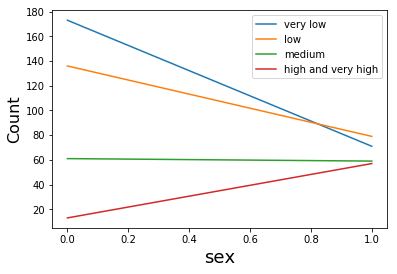

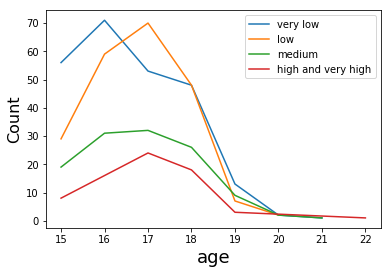

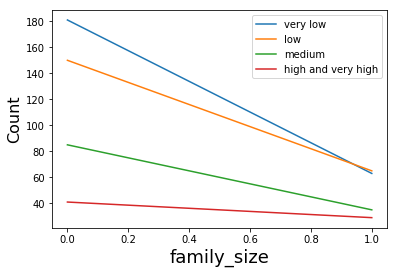

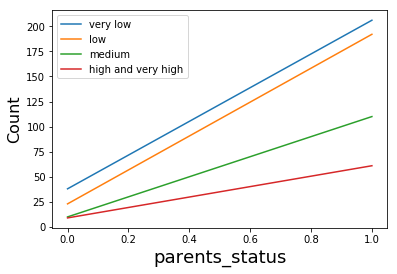

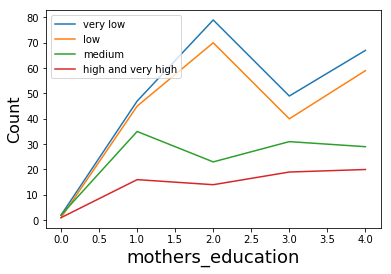

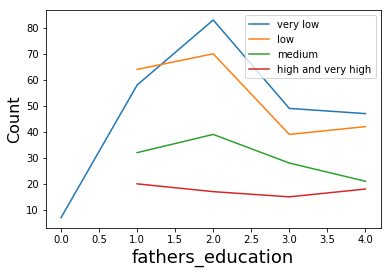

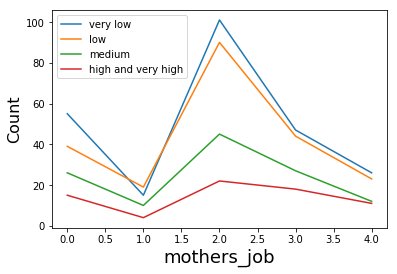

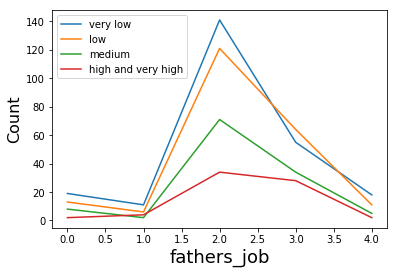

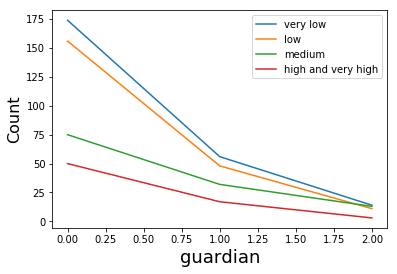

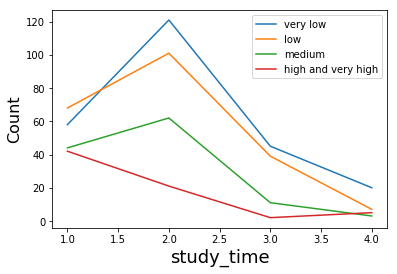

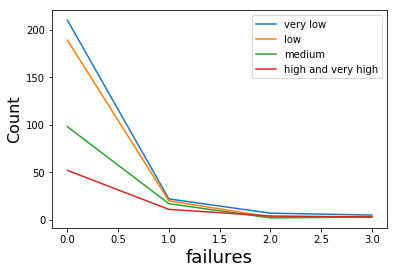

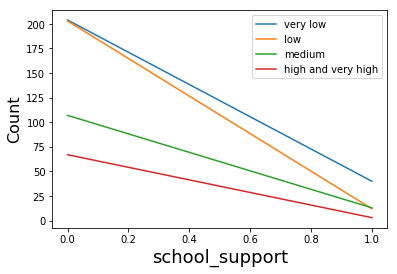

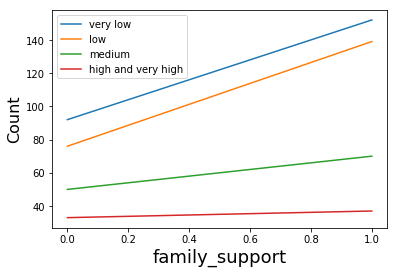

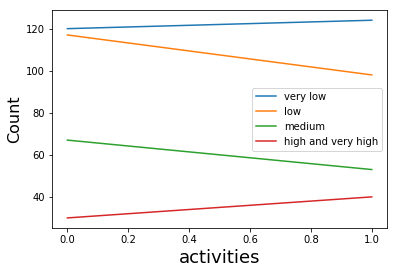

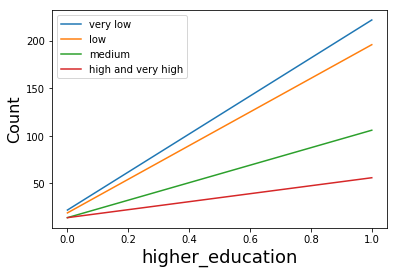

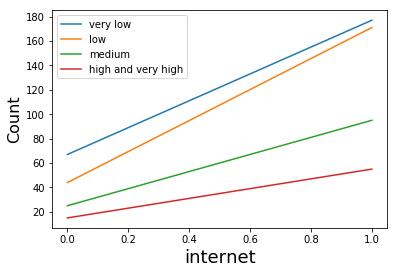

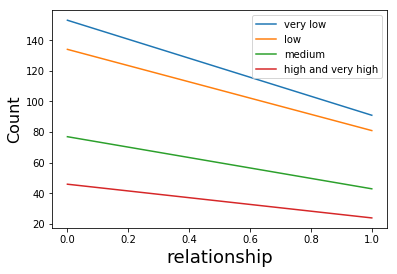

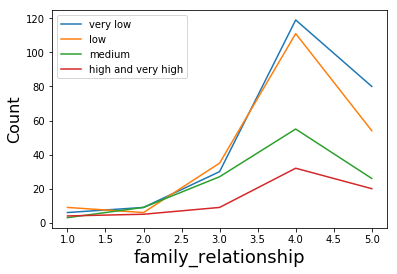

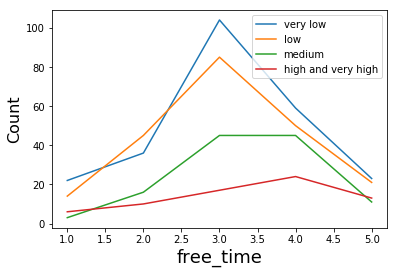

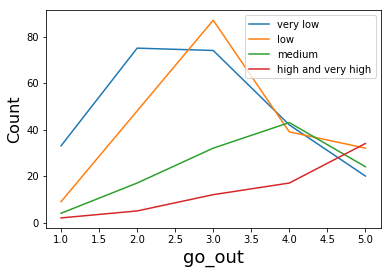

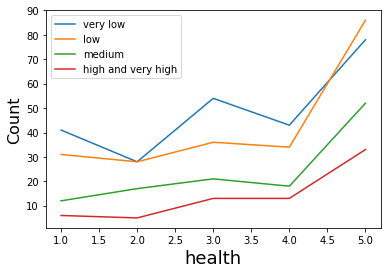

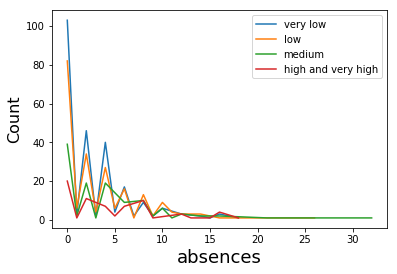

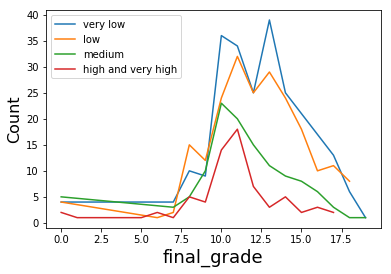

In [6]:
### Visualization of input data in curves

for column in data:
    feature = data[column]
    if column != 'alcohol_consumption':
        x_axis = []
        y_axis = []
        for i in range(1,5):
            indices = np.where(Y == i)
            feature_filtrated = np.array(feature)[indices]
            unique, counts = np.unique(feature_filtrated, return_counts=True)
            y_axis.append(counts)
            x_axis.append(unique)
        np_y_axis = np.array(y_axis)
        np_x_axis = np.array(x_axis)
        labels = ['very low','low','medium','high and very high']
        plt.plot(np_x_axis[0],np_y_axis[0],label=labels[0])
        plt.plot(np_x_axis[1],np_y_axis[1],label=labels[1])
        plt.plot(np_x_axis[2],np_y_axis[2],label=labels[2])
        plt.plot(np_x_axis[3],np_y_axis[3],label=labels[3])
        plt.legend()
        plt.xlabel(column, fontsize=18)
        plt.ylabel('Count', fontsize=16)
        plt.show()

/opt/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


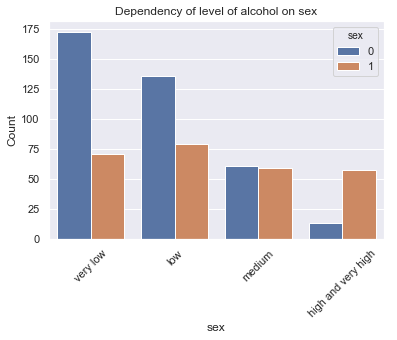

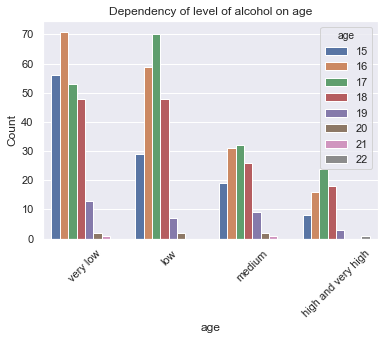

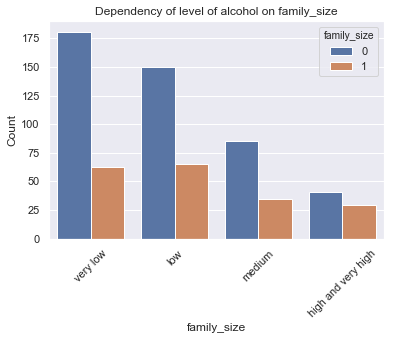

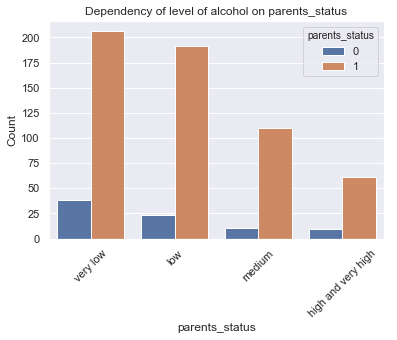

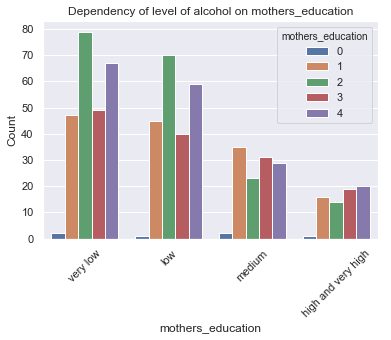

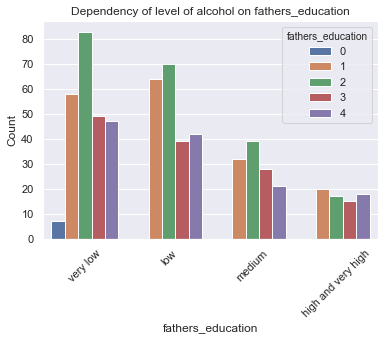

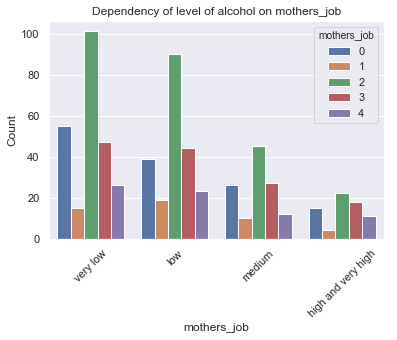

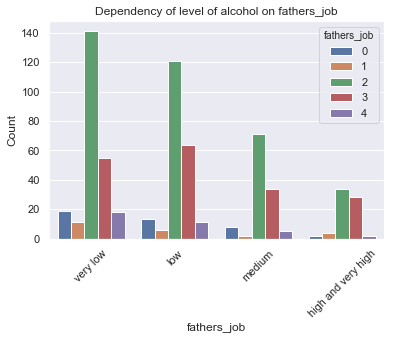

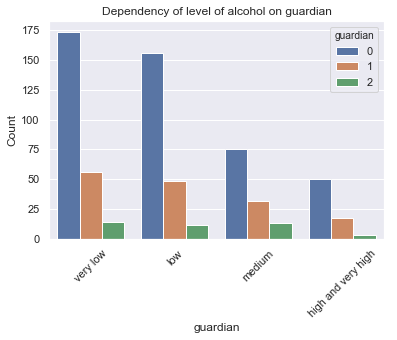

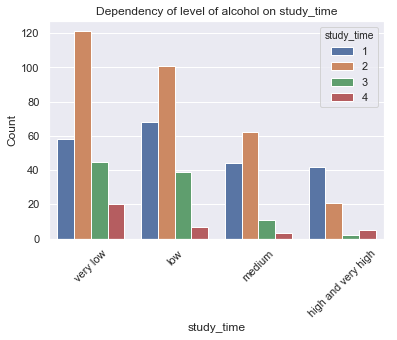

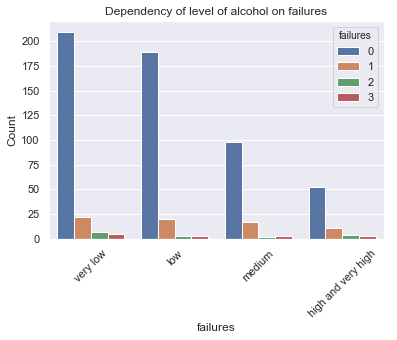

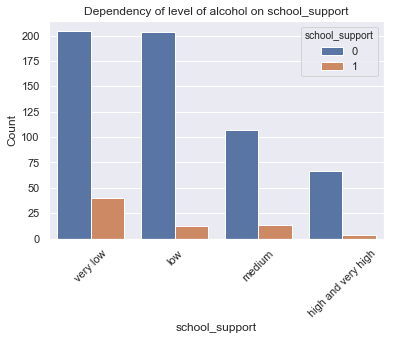

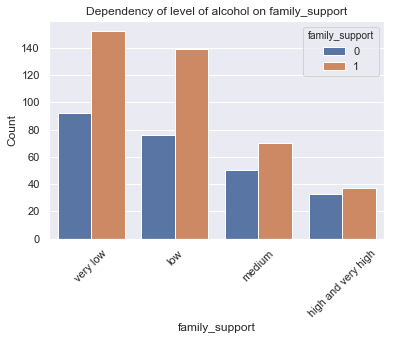

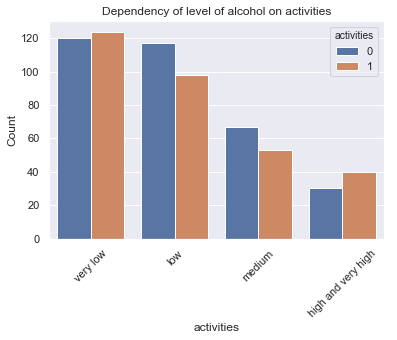

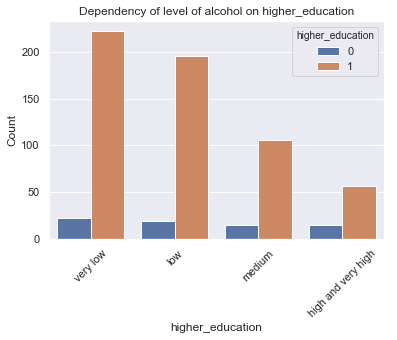

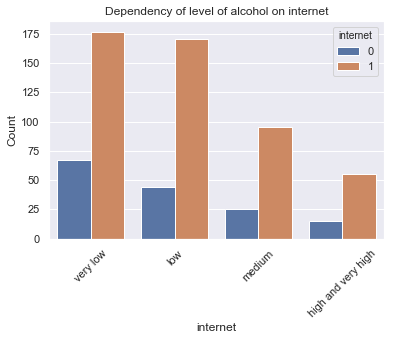

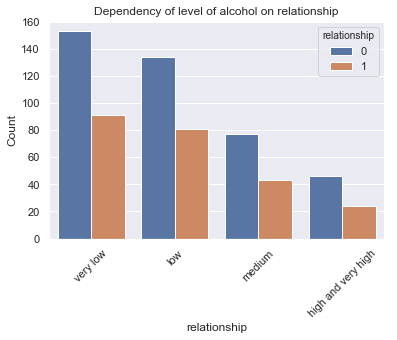

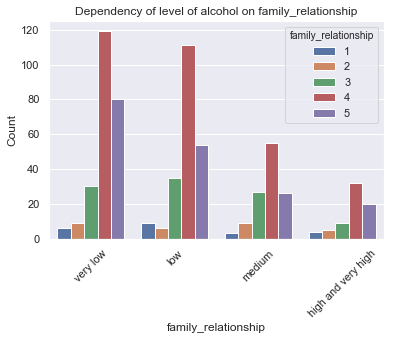

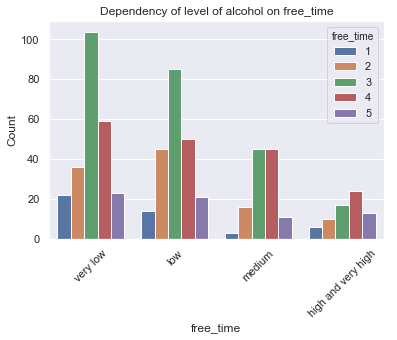

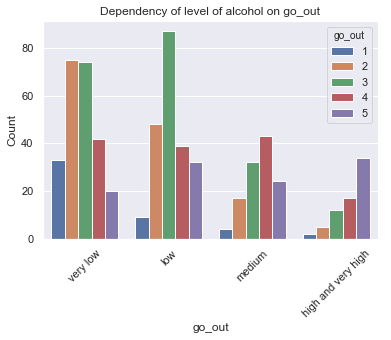

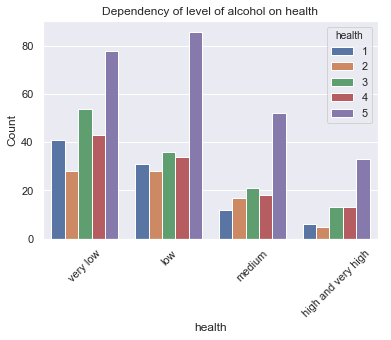

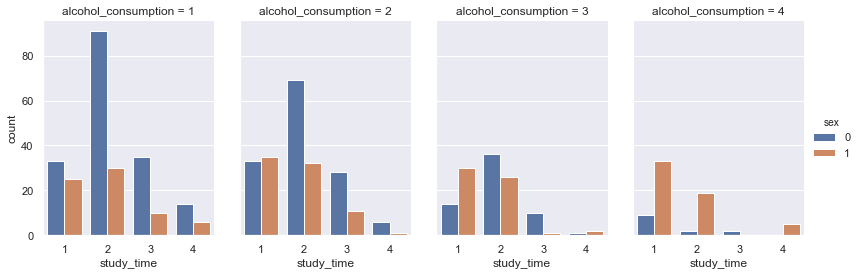

In [7]:
### Visualization of input data in histograms

dataVisualize = pd.DataFrame(pd.read_csv('../data/alcohol.csv'))

sns.set(style="darkgrid")
labels = ['very low','low','medium','high and very high']
for i in data:
    if i != 'alcohol_consumption' and i != 'absences' and i != 'final_grade':
        plt.figure(i)
        fig = sns.countplot(x="alcohol_consumption", hue=i, data=dataVisualize)
        fig.set(xlabel=i, ylabel='Count')
        plt.title("Dependency of level of alcohol on {}".format(i))
        fig.set_xticklabels(labels, rotation=45)
        plt.show
        
# different view with multiple attributes
g = sns.catplot(x="study_time", hue="sex", col="alcohol_consumption",
                data=dataVisualize, kind="count",
                height=4, aspect=.7);

In [8]:
### Pre-process data using MinMaxScaler() [0,1]

min_max_scaler = preprocessing.MinMaxScaler()
X_process = min_max_scaler.fit_transform(X)

/opt/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
### Constants

train_and_valid = 0.80 # CAN BE CHANGED
valid_fix = 0.20 # DO NOT CHANGE !!!
train_calc = train_and_valid * (1 - valid_fix)
valid_calc = train_and_valid - train_calc
test_calc = 1 - train_calc - valid_calc

train_fraction=train_calc
validation_fraction=valid_calc
test_fraction=test_calc

hidden_layer_neurons = 8
output_layer_neurons = 2

epochs = 10
learning_rate = 0.001
alpha=0.001
goal = 1e-5
tolerance=0.0001
max_iterations=10000
k_cross_validation = 5

#X_train = 64% of features
#X_validation = 16% of features
#X_test = 20% of features

#T_train = 64 % of targets
#T_validation = 16% of targets
#T_test = 20% of targets

#X2_train = 80% of features
#X2_test = 20% of features

#T2_train = 80% of targets
#T2_test = 20% of targets

split_sizes = [int(len(X_process)*train_fraction), int(len(X_process)*(train_fraction+validation_fraction))]
X_train,X_validation,X_test = np.split(X_process, split_sizes)
T_train,T_validation,T_test = np.split(T, split_sizes)
X2_train, X2_test, T2_train, T2_test = train_test_split(
    X_process, T, 
    train_size=train_fraction+validation_fraction, 
    test_size=test_fraction
)


Repetitions count: 1
Epoch: 10; Error: 172.032394713;
The maximum number of train epochs is reached


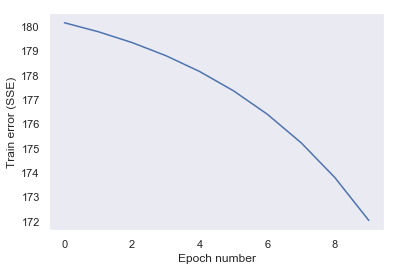

Validation success: 40.86538461538461 %
Validation error: 59.13461538461539 %
Number of layers: 2
Learning rate: 0.001
Weights of 0 layer: [[ 0.32066524  0.68692673  0.34572862 -0.00430523  1.02653878 -0.4588542
   0.2967522   0.34562258 -0.58902244 -0.34319773  0.93709665 -0.97578844
  -0.80400022 -0.08717061  0.22312591 -1.04921323  0.65850787  0.73906286
  -1.11291186  0.64262364 -0.55522618  0.23473358 -0.07792319]
 [-0.04471455  1.11017109  0.0057816   0.16798806 -0.95472206  0.30739197
   0.17256745 -0.43119923 -0.41632416  0.40708407  1.11915577  0.4585264
   0.91216278  0.95580839  0.57001722 -0.51452485  0.04830555  0.56295534
   0.44404202  0.55890818 -1.00614161 -1.02953107 -0.03759393]
 [ 0.88780308  0.13959547  0.0392695   0.84828058  0.67936159 -0.05374646
  -0.7531956   0.10268631 -0.04173064  0.45339134 -0.53397354  0.11785889
  -0.89777841 -0.35501038 -0.895317    0.78762898 -0.70160948  0.91335696
   0.56290107  1.00742158  0.64909378 -0.06346737  1.01565649]
 [ 0.810

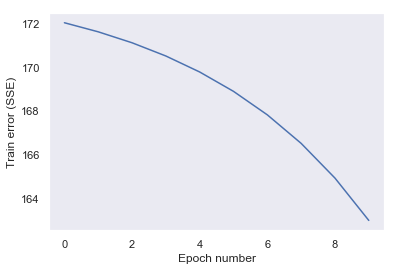

Validation success: 40.86538461538461 %
Validation error: 59.13461538461539 %
Number of layers: 2
Learning rate: 0.001
Weights of 0 layer: [[ 0.29986634  0.66612783  0.32492971 -0.02510413  1.01183128 -0.46848552
   0.2759533   0.32482368 -0.56822354 -0.32239883  0.91629775 -0.95498953
  -0.80940139 -0.10796951  0.21349459 -1.07001214  0.63770897  0.71826396
  -1.13371076  0.62182474 -0.57602508  0.21393467 -0.08755451]
 [-0.02391565  1.13097     0.02658051  0.18878696 -0.93392316  0.32819088
   0.19336636 -0.41040033 -0.39552526  0.42788297  1.13995467  0.4793253
   0.93296168  0.97660729  0.59081612 -0.49372595  0.06910445  0.58375424
   0.46484093  0.57970709 -0.9853427  -1.00873217 -0.01679503]
 [ 0.90860199  0.16039437  0.0600684   0.86907948  0.70016049 -0.03294756
  -0.7323967   0.12348521 -0.02093174  0.47419024 -0.51317464  0.13256638
  -0.8769795  -0.33421148 -0.8745181   0.80842788 -0.68081058  0.93415586
   0.58369997  1.02822048  0.66989268 -0.04266847  1.03645539]
 [ 0.78

In [10]:
### Train & Validate (Neurolab feed-forward backpropagation network with custom validation implementation)

# Create a neural network (Multilayer feed forward perceptron)
net = nl.net.newff(nl.tool.minmax(X_process),[hidden_layer_neurons,output_layer_neurons])

# Change the transfer function for the output layer
net.layers[0].transf = nl.trans.LogSig() # hidden layer
net.layers[1].transf = nl.trans.LogSig() # output layer

# Train the network & Simulate validation
i = 1
i_max = max_iterations
previous_accuracy = 0
can_try_again = True
while i <= i_max:
    print"\nRepetitions count:", i
    error = net.trainf = nl.train.train_rprop(net, X_train, T_train, epochs=epochs, show=10, lr=learning_rate, goal=0)
    
    plt.plot(error)
    plt.xlabel('Epoch number')
    plt.ylabel('Train error (SSE)')
    plt.grid()
    plt.show()
    
    out_validation = net.sim(X_validation)
    out_validation = np.around(out_validation)
    
    accuracy = np.mean(out_validation == T_validation)
    error_accuracy = 1 - accuracy
    
    print"Validation success:", accuracy*100, "%"
    print"Validation error:", error_accuracy*100, "%"
    print"Number of layers:", len(net.layers)
    print"Learning rate:", learning_rate
    
    for n in range(0,len(net.layers)):
        print"Weights of", n, "layer:", net.layers[n].np['w']
        print"Biases of", n, "layer:", net.layers[n].np['b']
    
    if (accuracy-previous_accuracy <= tolerance) or (i >= i_max):
        if (can_try_again):
            previous_accuracy = accuracy
            i+=1 #training continues
            can_try_again = False
        i=i_max+1 #training stops
    else:
        previous_accuracy = accuracy
        i+=1 #training continues
        can_try_again = True


In [11]:
### Predict (Neurolab feed-forward backpropagation network with custom validation implementation)

out_test = net.sim(X_test)
out_test = np.around(out_test)
accuracy = np.mean(out_test == T_test)
print"Success:", round(accuracy * 100, 2), "%"

Success: 41.54 %


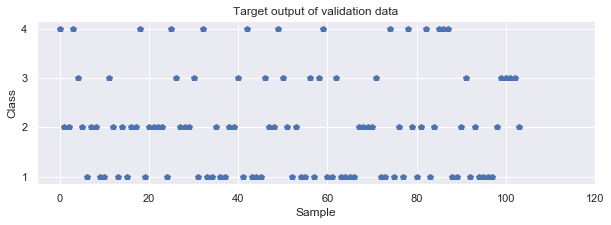

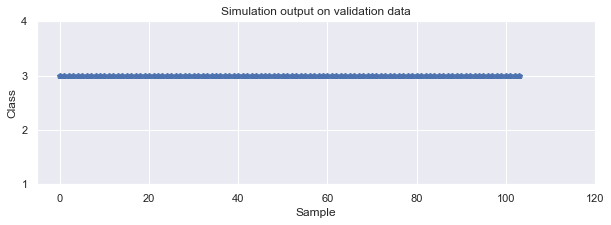

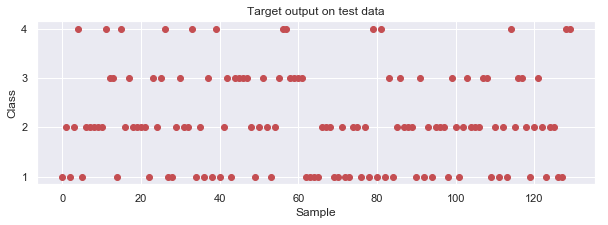

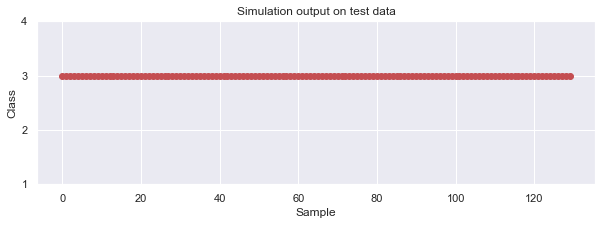

In [12]:
### Compare the results with target data (Neurolab feed-forward backpropagation network with custom validation implementation)

T_val_converted = convert(T_validation)
T_test_converted = convert(T_test)
out_val_converted = convert(out_validation)
out_test_converted = convert(out_test)

plt.figure(figsize=(10,3))
plt.plot(T_val_converted,'p')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Target output of validation data')
plt.xticks(np.arange(0, 130, 20)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(out_val_converted,'p')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Simulation output on validation data')
plt.xticks(np.arange(0, 130, 20)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(T_test_converted,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Target output on test data')
plt.xticks(np.arange(0, 130, 20)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(out_test_converted,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Simulation output on test data')
plt.xticks(np.arange(0, 130, 20)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

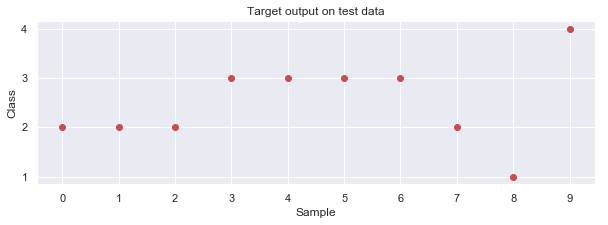

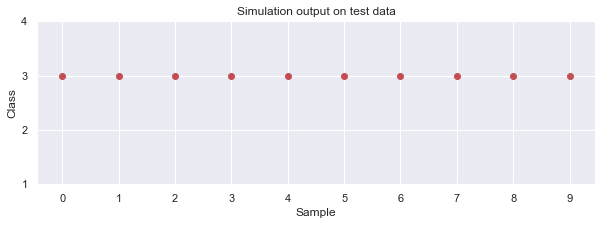

In [13]:
### Compare 10 random patterns (Neurolab feed-forward backpropagation network with custom validation implementation)

T_test_converted = convert(T_test)
out_test_converted = convert(out_test)
length = 10
chosen_out_test = []
chosen_T_test = []
rand_numbers = np.sort(np.random.randint(len(T_test_converted), size=(length)))
for i in rand_numbers:
    chosen_out_test.append(out_test_converted[i])
    chosen_T_test.append(T_test_converted[i])

plt.figure(figsize=(10,3))
plt.plot(chosen_T_test,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Target output on test data')
plt.xticks(np.arange(0, 10, 1)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(chosen_out_test,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Simulation output on test data')
plt.xticks(np.arange(0, 10, 1)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

Training scores: [[-0.         -0.         -0.         -0.         -0.        ]
 [-0.         -0.015      -0.02       -0.01       -0.01      ]
 [-0.275      -0.28       -0.045      -0.045      -0.0675    ]
 [-0.29625    -0.295      -0.30125    -0.30625    -0.27625   ]
 [-0.31204819 -0.3060241  -0.30481928 -0.31566265 -0.30120482]]
Validation scores: [[-0.40384615 -0.42307692 -0.34134615 -0.31730769 -0.36407767]
 [-0.43269231 -0.43269231 -0.37019231 -0.39423077 -0.34951456]
 [-0.35576923 -0.4375     -0.38942308 -0.38942308 -0.39805825]
 [-0.32211538 -0.40384615 -0.32692308 -0.29326923 -0.34951456]
 [-0.35096154 -0.42307692 -0.34134615 -0.28846154 -0.34466019]]
Mean training scores 1     -0.000000
100    0.011000
200    0.142500
400    0.295000
415    0.307952
dtype: float64
Mean validation scores 1      0.369931
100    0.395864
200    0.394035
400    0.339134
415    0.349701
dtype: float64


(0, 0.5)

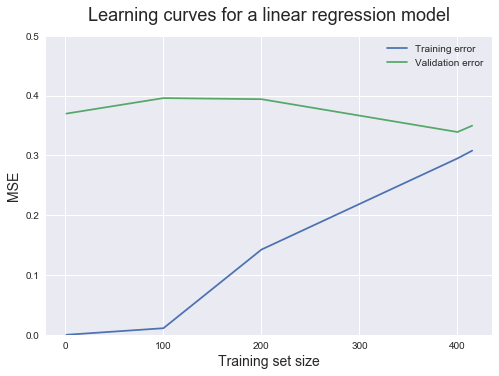

In [14]:
### Train & Validate (Scikit-learn MLPClassifier)

mlp = MLPClassifier(
    activation='logistic', 
    alpha=alpha, 
    batch_size='auto', 
    early_stopping=False, 
    hidden_layer_sizes=(hidden_layer_neurons), 
    learning_rate='constant',
    learning_rate_init=learning_rate, 
    max_iter=max_iterations,
    shuffle=True,
    solver='adam',
    tol=tolerance,
    validation_fraction=validation_fraction,
    verbose=False
)

# 519 je 80% 649, počet prvkov predanych v parametre Y a 
# y sa rovna a z neho použije 80% ako training a 
# 20% ako validation a tých 80% je maximalna posledna hodnota čo môže byť v training_size

train_sizes = [1,100,200,400,415] #649*0,80*0,80=415
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = mlp,
    X = X2_train,
    y = T2_train, 
    train_sizes = train_sizes, 
    cv = k_cross_validation,
    scoring = 'neg_mean_squared_error'
)

print'Training scores:', train_scores
print'Validation scores:', validation_scores

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print'Mean training scores', pd.Series(train_scores_mean, index = train_sizes)
print'Mean validation scores',pd.Series(validation_scores_mean, index = train_sizes)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.5)

In [15]:
### Train & Predict (Scikit-learn MLPClassifier)

mlp.fit(X_train,T_train)
out_test = mlp.predict(X_test)
scores = mlp.score(X_test, T_test)

print(confusion_matrix(convert(T_test),convert(out_test)))
print(classification_report(T_test,out_test))
print"Success:", round(scores * 100, 2), "%"

[[34  1  2  2]
 [41  6  2  1]
 [13  6  3  6]
 [ 6  3  0  4]]
              precision    recall  f1-score   support

           0       0.65      0.32      0.43        41
           1       0.48      0.22      0.30        63

   micro avg       0.55      0.26      0.35       104
   macro avg       0.57      0.27      0.37       104
weighted avg       0.55      0.26      0.35       104
 samples avg       0.15      0.17      0.15       104

Success: 36.15 %


/opt/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


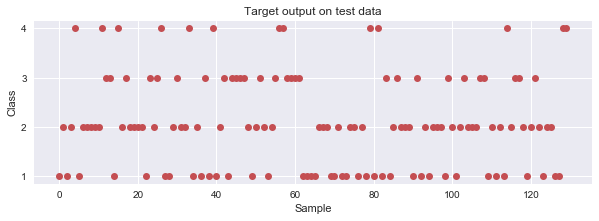

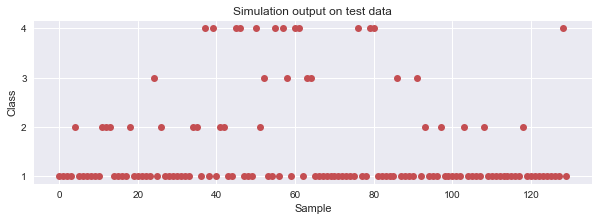

In [16]:
### Compare the results with target data (Scikit-learn MLPClassifier)

T_test_converted = convert(T_test)
out_test_converted = convert(out_test)

plt.figure(figsize=(10,3))
plt.plot(T_test_converted,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Target output on test data')
plt.xticks(np.arange(0, 130, 20)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(out_test_converted,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Simulation output on test data')
plt.xticks(np.arange(0, 130, 20)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

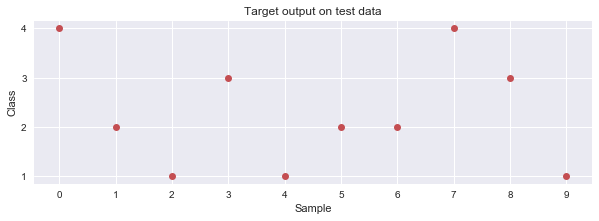

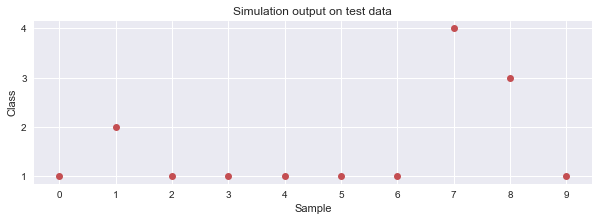

In [17]:
### Compare 10 random patterns (Scikit-learn MLPClassifier)

T_test_converted = convert(T_test)
out_test_converted = convert(out_test)
length = 10
chosen_out_test = []
chosen_T_test = []
rand_numbers = np.sort(np.random.randint(len(T_test_converted), size=(length)))
for i in rand_numbers:
    chosen_out_test.append(out_test_converted[i])
    chosen_T_test.append(T_test_converted[i])

plt.figure(figsize=(10,3))
plt.plot(chosen_T_test,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Target output on test data')
plt.xticks(np.arange(0, 10, 1)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(chosen_out_test,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Simulation output on test data')
plt.xticks(np.arange(0, 10, 1)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

Training scores: [[-0.         -0.         -0.         -0.         -0.        ]
 [-0.1538921  -0.14906856 -0.14906856 -0.14906856 -0.14906856]
 [-0.18276732 -0.17983689 -0.1801791  -0.1801791  -0.1801791 ]
 [-0.18824075 -0.18623332 -0.18806189 -0.19406639 -0.18613157]
 [-0.18889607 -0.18668214 -0.18894535 -0.19415119 -0.18643333]]
Validation scores: [[-0.40384615 -0.42307692 -0.34134615 -0.31730769 -0.36407767]
 [-0.28292418 -0.2972731  -0.27036003 -0.2469724  -0.28224243]
 [-0.23503399 -0.24178417 -0.22549705 -0.21450796 -0.24808299]
 [-0.22093908 -0.22957249 -0.21501167 -0.19975518 -0.22409891]
 [-0.21929521 -0.22902546 -0.21202281 -0.19950909 -0.22337619]]
Mean training scores 1     -0.000000
100    0.150033
200    0.180628
400    0.188547
415    0.189022
dtype: float64
Mean validation scores 1      0.369931
100    0.275954
200    0.232981
400    0.217875
415    0.216646
dtype: float64


(0, 0.5)

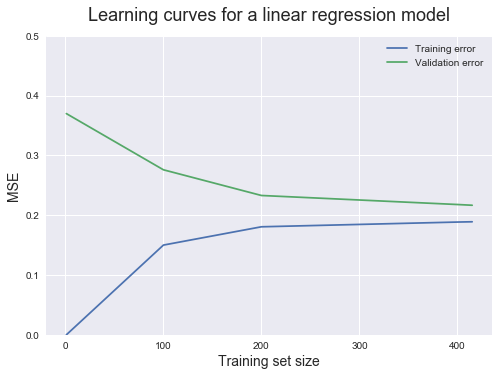

In [18]:
### Train & Validate (Scikit-learn LinearRegression)

mlp = LinearRegression()

# 519 je 80% 649, počet prvkov predanych v parametre Y a 
# y sa rovna a z neho použije 80% ako training a 
# 20% ako validation a tých 80% je maximalna posledna hodnota čo môže byť v training_size

train_sizes = [1,100,200,400,415] #649*0,80*0,80=415
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = mlp,
    X = X2_train,
    y = T2_train, 
    train_sizes = train_sizes, 
    cv = k_cross_validation,
    scoring = 'neg_mean_squared_error'
)

print'Training scores:', train_scores
print'Validation scores:', validation_scores

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print'Mean training scores', pd.Series(train_scores_mean, index = train_sizes)
print'Mean validation scores',pd.Series(validation_scores_mean, index = train_sizes)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.5)

In [19]:
### Train & Predict (Scikit-learn LinearRegression)

mlp.fit(X_train,T_train)
out_test = mlp.predict(X_test)
scores = mlp.score(X_test, T_test)

out_test = np.around(out_test)
accuracy = np.mean(out_test == T_test)

print(confusion_matrix(convert(T_test),convert(out_test)))
print(classification_report(T_test,out_test))

[[31  4  2  2]
 [27 11  6  6]
 [10 11  2  5]
 [ 7  3  0  3]]
              precision    recall  f1-score   support

           0       0.38      0.24      0.30        41
           1       0.51      0.37      0.43        63

   micro avg       0.46      0.32      0.38       104
   macro avg       0.45      0.30      0.36       104
weighted avg       0.46      0.32      0.38       104
 samples avg       0.19      0.22      0.19       104



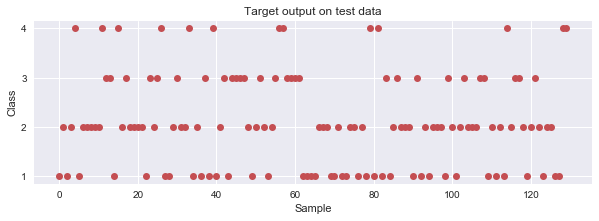

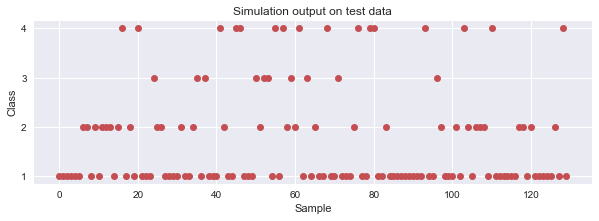

In [20]:
### Compare the results with target data (Scikit-learn LinearRegression)

T_test_converted = convert(T_test)
out_test_converted = convert(out_test)

plt.figure(figsize=(10,3))
plt.plot(T_test_converted,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Target output on test data')
plt.xticks(np.arange(0, 130, 20)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(out_test_converted,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Simulation output on test data')
plt.xticks(np.arange(0, 130, 20)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

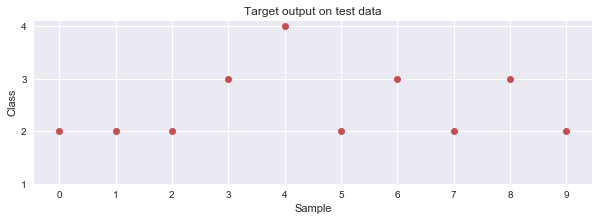

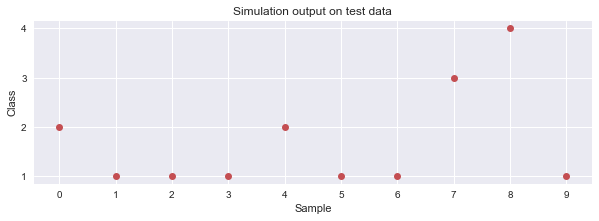

In [21]:
### Compare 10 random patterns (Scikit-learn LinearRegression)

T_test_converted = convert(T_test)
out_test_converted = convert(out_test)
length = 10
chosen_out_test = []
chosen_T_test = []
rand_numbers = np.sort(np.random.randint(len(T_test_converted), size=(length)))
for i in rand_numbers:
    chosen_out_test.append(out_test_converted[i])
    chosen_T_test.append(T_test_converted[i])

plt.figure(figsize=(10,3))
plt.plot(chosen_T_test,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Target output on test data')
plt.xticks(np.arange(0, 10, 1)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(chosen_out_test,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Simulation output on test data')
plt.xticks(np.arange(0, 10, 1)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

In [22]:
### Error analysis - decision on which attributes to remove depending on mode of features
# if mode > 70% remove from dataset, otherwise it can remain

indices = []
for index in range(len(T_validation)):
        equal = np.array_equal(T_validation[index], out_validation[index])
        if not equal:
            indices.append(index)
            
notEqualdata = []
j = 0
for i in indices:
    notEqualdata.append(X_validation[i,:])
    j += 1
    
equaldataLength = len(notEqualdata)

notEqualdata = np.array(pd.DataFrame(notEqualdata))
invertedTable = min_max_scaler.inverse_transform(notEqualdata)

mode = []
modeCount = []
for i in range(23):
    column = invertedTable[:,i]
    mode.append(stats.mode(column))
    modeCount.append(stats.mode(column).count)

modeCount = np.array(modeCount).ravel()
modeCount = modeCount.astype(float)

modeTable = pd.DataFrame(mode)
modeTable = modeTable.astype(float)

relativeCount = [x / equaldataLength for x in modeCount]
modeTable = modeTable.assign(percentage = relativeCount)

removebooleans = [ x > 0.70 for x in relativeCount]
modeTable = modeTable.assign(remove = removebooleans)
print(modeTable)

    mode  count  percentage  remove
0    0.0   65.0    0.738636    True
1   16.0   36.0    0.409091   False
2    0.0   63.0    0.715909    True
3    1.0   78.0    0.886364    True
4    1.0   35.0    0.397727   False
5    1.0   33.0    0.375000   False
6    2.0   45.0    0.511364   False
7    2.0   55.0    0.625000   False
8    0.0   53.0    0.602273   False
9    1.0   37.0    0.420455   False
10   0.0   67.0    0.761364    True
11   0.0   82.0    0.931818    True
12   1.0   60.0    0.681818   False
13   0.0   53.0    0.602273   False
14   1.0   70.0    0.795455    True
15   1.0   49.0    0.556818   False
16   0.0   53.0    0.602273   False
17   4.0   40.0    0.454545   False
18   3.0   31.0    0.352273   False
19   3.0   25.0    0.284091   False
20   5.0   26.0    0.295455   False
21   0.0   40.0    0.454545   False
22  11.0   18.0    0.204545   False


In [23]:
### Error analysis - decision on which attributes to remove depending on mode of features
# if mode > 70% remove from dataset, otherwise it can remain

indices = []
for index in range(len(T_test)):
        equal = np.array_equal(T_test[index], out_test[index])
        if not equal:
            indices.append(index)
            
notEqualdata = []
j = 0
for i in indices:
    notEqualdata.append(X_test[i,:])
    j += 1
    
equaldataLength = len(notEqualdata)

notEqualdata = np.array(pd.DataFrame(notEqualdata))
invertedTable = min_max_scaler.inverse_transform(notEqualdata)

mode = []
modeCount = []
for i in range(23):
    column = invertedTable[:,i]
    mode.append(stats.mode(column))
    modeCount.append(stats.mode(column).count)

modeCount = np.array(modeCount).ravel()
modeCount = modeCount.astype(float)

modeTable = pd.DataFrame(mode)
modeTable = modeTable.astype(float)

relativeCount = [x / equaldataLength for x in modeCount]
modeTable = modeTable.assign(percentage = relativeCount)

removebooleans = [ x > 0.70 for x in relativeCount]
modeTable = modeTable.assign(remove = removebooleans)
print(modeTable)

    mode  count  percentage  remove
0    0.0   45.0    0.542169   False
1   17.0   30.0    0.361446   False
2    0.0   55.0    0.662651   False
3    1.0   70.0    0.843373    True
4    1.0   32.0    0.385542   False
5    1.0   29.0    0.349398   False
6    2.0   27.0    0.325301   False
7    2.0   41.0    0.493976   False
8    0.0   59.0    0.710843    True
9    2.0   38.0    0.457831   False
10   0.0   62.0    0.746988    True
11   0.0   81.0    0.975904    True
12   1.0   46.0    0.554217   False
13   0.0   45.0    0.542169   False
14   1.0   66.0    0.795181    True
15   1.0   56.0    0.674699   False
16   0.0   44.0    0.530120   False
17   4.0   40.0    0.481928   False
18   3.0   24.0    0.289157   False
19   3.0   31.0    0.373494   False
20   5.0   37.0    0.445783   False
21   0.0   28.0    0.337349   False
22  10.0   18.0    0.216867   False
